In [1]:
# loading the esstential libraries 

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read the dataset 

df = pd.read_csv('Demo_Data_Loan.csv')
print(df.shape)
df.head(25)

(367, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,0
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,0
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,0
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,0
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,0


In [3]:
#Unique value count
for cols in df.columns:
    unique_vals = df[cols].unique()
    if len(unique_vals) <= 5:
        print("Feature----->", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals)
    else:
        print("Feature---->", cols, " has ", len(unique_vals), " unique values")

Feature----> Loan_ID  has  367  unique values
Feature-----> Gender  has  3  unique values ---->  ['Male' 'Female' nan]
Feature-----> Married  has  2  unique values ---->  ['Yes' 'No']
Feature-----> Dependents  has  5  unique values ---->  ['0' '1' '2' '3+' nan]
Feature-----> Education  has  2  unique values ---->  ['Graduate' 'Not Graduate']
Feature-----> Self_Employed  has  3  unique values ---->  ['No' 'Yes' nan]
Feature----> ApplicantIncome  has  314  unique values
Feature----> CoapplicantIncome  has  194  unique values
Feature----> LoanAmount  has  145  unique values
Feature----> Loan_Amount_Term  has  13  unique values
Feature-----> Credit_History  has  3  unique values ---->  [ 1. nan  0.]
Feature-----> Property_Area  has  3  unique values ---->  ['Urban' 'Semiurban' 'Rural']
Feature-----> Loan Approved  has  2  unique values ---->  [0 1]


In [4]:
## checking for null values
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan Approved         0
dtype: int64

In [5]:
# remove duplicate entries, if any
df.drop_duplicates(inplace = True)
print(df.shape)

(367, 13)


In [6]:
## checking for null values
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan Approved         0
dtype: int64

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan Approved
count,367.000000,367.000000,362.000000,361.000000,338.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444,0.070845
std,4910.685399,2334.232099,61.366652,65.156643,0.380150,0.256915
min,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000,0.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000,0.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000,1.000000


In [8]:
#droping null/nan values
df=df.dropna(axis=0) #axis=0 means droping row

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan Approved
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,4637.352941,1528.262976,136.792388,342.671280,0.840830,0.079585
std,4790.683934,2377.599209,59.699582,65.655503,0.366469,0.271119
min,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,2875.000000,0.000000,102.000000,360.000000,1.000000,0.000000
50%,3833.000000,879.000000,126.000000,360.000000,1.000000,0.000000
75%,5000.000000,2400.000000,158.000000,360.000000,1.000000,0.000000
max,72529.000000,24000.000000,460.000000,480.000000,1.000000,1.000000


In [10]:
# Analyzing the target variable
df['Loan Approved'].value_counts()

0    266
1     23
Name: Loan Approved, dtype: int64

In [11]:
# normalize and check the proportion
df['Loan Approved'].value_counts(normalize=True)

0    0.920415
1    0.079585
Name: Loan Approved, dtype: float64

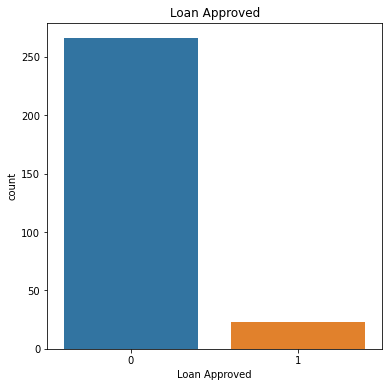

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='Loan Approved', data=df)
plt.title('Loan Approved')
plt.show()

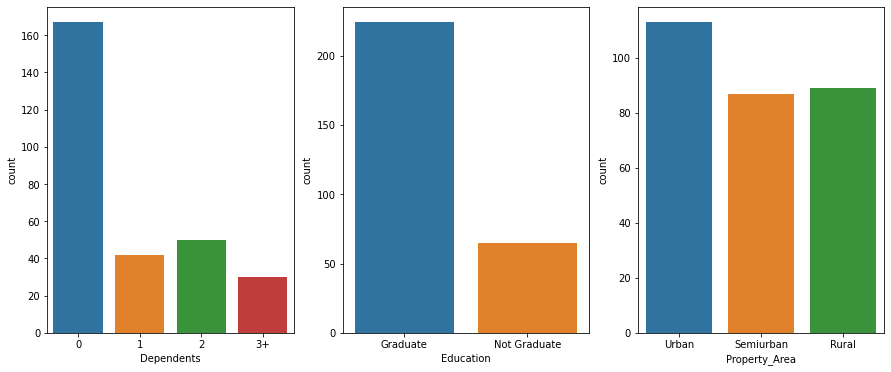

In [13]:
# Analyzing Independent variable (Ordinal)

plt.figure(figsize=(15,6))
plt.subplot(131)
sns.countplot(x='Dependents', data=df)
plt.subplot(132)
sns.countplot(x='Education', data=df)
plt.subplot(133)
sns.countplot(x='Property_Area', data=df)
plt.show()

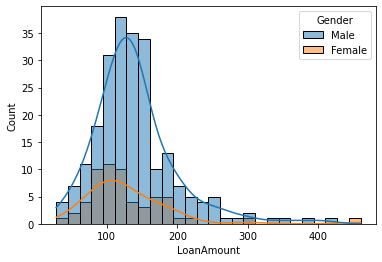

In [14]:
# Analyzing LoanAmount
sns.histplot(x = 'LoanAmount', kde = True, data = df, stat = 'count', hue="Gender");

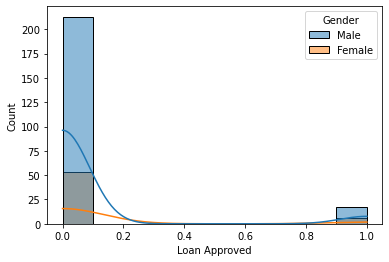

In [15]:
# Analyzing Loan_Amount_Term
sns.histplot(x = 'Loan Approved', kde = True, data = df, stat = 'count', hue='Gender');

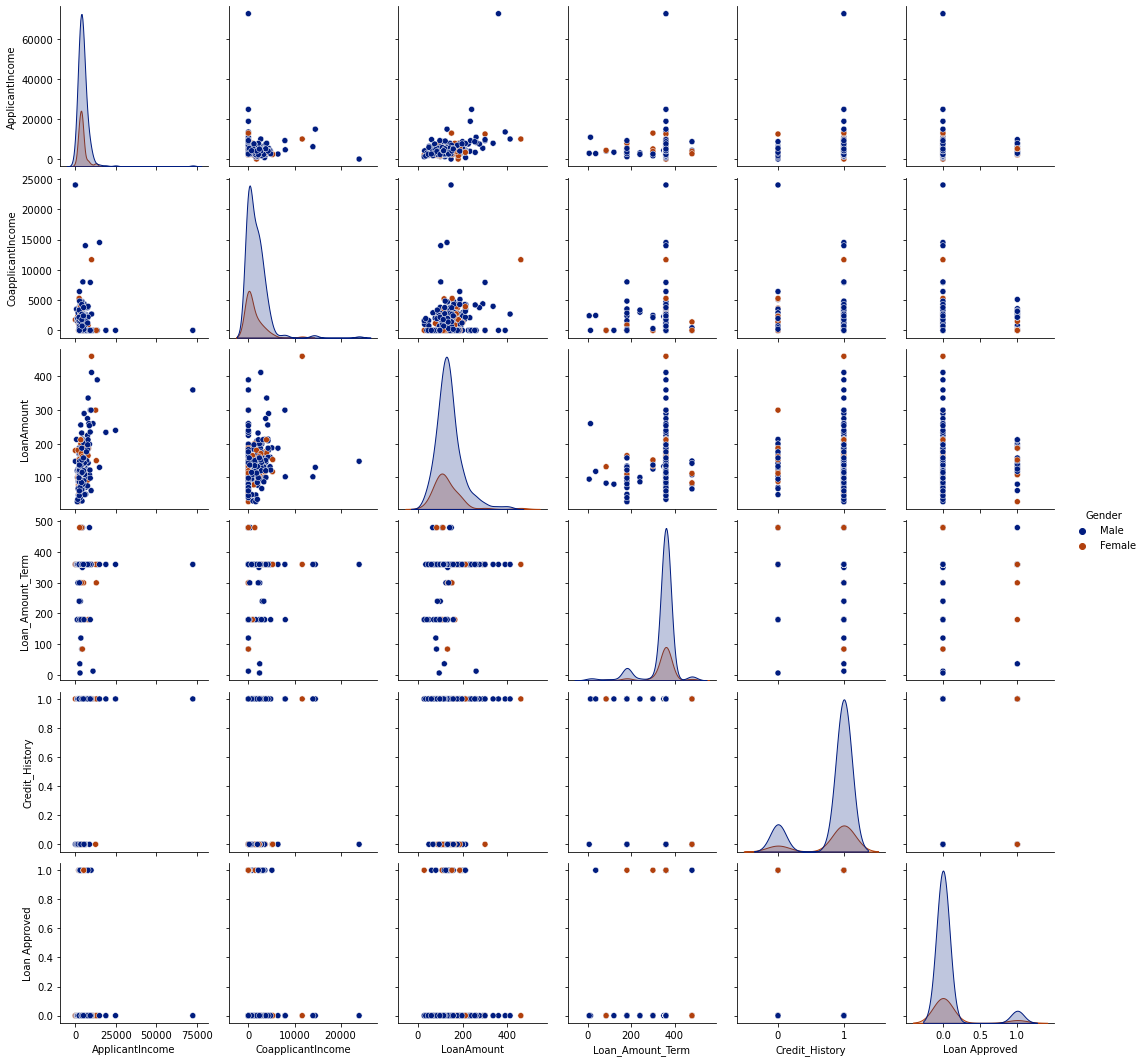

In [16]:
# showing pair plot against Gender
sns.pairplot(df,hue='Gender', palette='dark');

In [17]:
# Replacing 3+ values with 4
df = df.replace(to_replace = '3+', value = 4)

In [18]:
# Catagorical features
cat_features=['Married', 'Self_Employed', 'Education', 'Gender', 'Property_Area','Dependents']

In [19]:
df = pd.get_dummies(data = df, columns = cat_features)

In [20]:
df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan Approved,Married_No,Married_Yes,Self_Employed_No,...,Education_Not Graduate,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_4,Dependents_0,Dependents_1,Dependents_2
0,LP001015,5720,0,110.0,360.0,1.0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
1,LP001022,3076,1500,126.0,360.0,1.0,0,0,1,1,...,0,0,1,0,0,1,0,0,1,0
2,LP001031,5000,1800,208.0,360.0,1.0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,1
4,LP001051,3276,0,78.0,360.0,1.0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
5,LP001054,2165,3422,152.0,360.0,1.0,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0


In [21]:
# # Labeling the catagorical data
# df['Married'].replace({'No': 0, 'Yes': 1}, inplace = True)
# df['Self_Employed'].replace({'No': 0, 'Yes': 1}, inplace = True)
# df['Education'].replace({'Not Graduate': 0, 'Graduate': 1}, inplace = True)
# df['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
# df['Property_Area'].replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2}, inplace = True)

In [22]:
df

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan Approved,Married_No,Married_Yes,Self_Employed_No,...,Education_Not Graduate,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_4,Dependents_0,Dependents_1,Dependents_2
0,LP001015,5720,0,110.0,360.0,1.0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
1,LP001022,3076,1500,126.0,360.0,1.0,0,0,1,1,...,0,0,1,0,0,1,0,0,1,0
2,LP001031,5000,1800,208.0,360.0,1.0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,1
4,LP001051,3276,0,78.0,360.0,1.0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
5,LP001054,2165,3422,152.0,360.0,1.0,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,2269,2167,99.0,360.0,1.0,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
362,LP002971,4009,1777,113.0,360.0,1.0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,0
363,LP002975,4158,709,115.0,360.0,1.0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
365,LP002986,5000,2393,158.0,360.0,1.0,0,0,1,1,...,0,0,1,1,0,0,0,1,0,0


In [23]:
#Droping the Loan_ID column
df= df.drop(columns='Loan_ID')

In [24]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan Approved,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,...,Education_Not Graduate,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_4,Dependents_0,Dependents_1,Dependents_2
0,5720,0,110.0,360.0,1.0,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0
1,3076,1500,126.0,360.0,1.0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
2,5000,1800,208.0,360.0,1.0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,0
5,2165,3422,152.0,360.0,1.0,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2269,2167,99.0,360.0,1.0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
362,4009,1777,113.0,360.0,1.0,0,0,1,0,1,...,1,0,1,0,0,1,1,0,0,0
363,4158,709,115.0,360.0,1.0,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0
365,5000,2393,158.0,360.0,1.0,0,0,1,1,0,...,0,0,1,1,0,0,0,1,0,0


In [25]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan Approved,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,...,Education_Not Graduate,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_4,Dependents_0,Dependents_1,Dependents_2
0,5720,0,110.0,360.0,1.0,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0
1,3076,1500,126.0,360.0,1.0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
2,5000,1800,208.0,360.0,1.0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,0
5,2165,3422,152.0,360.0,1.0,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2269,2167,99.0,360.0,1.0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
362,4009,1777,113.0,360.0,1.0,0,0,1,0,1,...,1,0,1,0,0,1,1,0,0,0
363,4158,709,115.0,360.0,1.0,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0
365,5000,2393,158.0,360.0,1.0,0,0,1,1,0,...,0,0,1,1,0,0,0,1,0,0


In [26]:
X = df.drop(columns = 'Loan Approved') # X contains the features 
y= df['Loan Approved']
print(X.shape)
X.head()

(289, 20)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_4,Dependents_0,Dependents_1,Dependents_2
0,5720,0,110.0,360.0,1.0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0
1,3076,1500,126.0,360.0,1.0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0
2,5000,1800,208.0,360.0,1.0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0
5,2165,3422,152.0,360.0,1.0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0


In [27]:
X.head(25)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_4,Dependents_0,Dependents_1,Dependents_2
0,5720,0,110.0,360.0,1.0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0
1,3076,1500,126.0,360.0,1.0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0
2,5000,1800,208.0,360.0,1.0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0
5,2165,3422,152.0,360.0,1.0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0
6,2226,0,59.0,360.0,1.0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0
7,3881,0,147.0,360.0,0.0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,1
9,2400,2400,123.0,360.0,1.0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0
10,3091,0,90.0,360.0,1.0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0
14,4666,0,124.0,360.0,1.0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0


In [28]:
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_4,Dependents_0,Dependents_1,Dependents_2
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,4637.352941,1528.262976,136.792388,342.671280,0.840830,0.352941,0.647059,0.889273,0.110727,0.775087,0.224913,0.204152,0.795848,0.307958,0.301038,0.391003,0.103806,0.577855,0.145329,0.173010
std,4790.683934,2377.599209,59.699582,65.655503,0.366469,0.478714,0.478714,0.314338,0.314338,0.418250,0.418250,0.403780,0.403780,0.462450,0.459505,0.488822,0.305538,0.494758,0.353043,0.378912
min,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2875.000000,0.000000,102.000000,360.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3833.000000,879.000000,126.000000,360.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,5000.000000,2400.000000,158.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,72529.000000,24000.000000,460.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
scale_vars = []

for cols in X.columns:
    if X[cols].max() > 1:
        scale_vars.append(cols)
scale_vars

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
print(X_train.shape)
print(X_test.shape)

(231, 20)
(58, 20)


In [31]:
scaler.fit(X_train[scale_vars])
X_train[scale_vars] = scaler.transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [32]:
X_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_4,Dependents_0,Dependents_1,Dependents_2
268,0.080423,0.031250,0.048611,0.746835,0.0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1
242,0.048394,0.034500,0.178241,0.746835,1.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0
275,0.038233,0.062375,0.185185,0.746835,1.0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
43,0.089619,0.108333,0.398148,0.746835,1.0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0
135,0.058708,0.000000,0.224537,0.746835,1.0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0


In [33]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_4,Dependents_0,Dependents_1,Dependents_2
147,0.119993,0.000000,0.395833,0.746835,0.0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0
113,0.040287,0.141500,0.217593,0.746835,1.0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1
37,0.031256,0.116333,0.143519,0.746835,1.0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0
130,0.045954,0.052917,0.222222,0.746835,1.0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0
159,0.108853,0.000000,0.266204,0.746835,1.0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0


In [34]:
#features with zero variance
featuresWithZeroVariance = []
for cols in X_train.columns:
    unique_vals = X_train[cols].unique()
    if len(unique_vals) == 1:
        featuresWithZeroVariance.append(cols)
featuresWithZeroVariance

[]

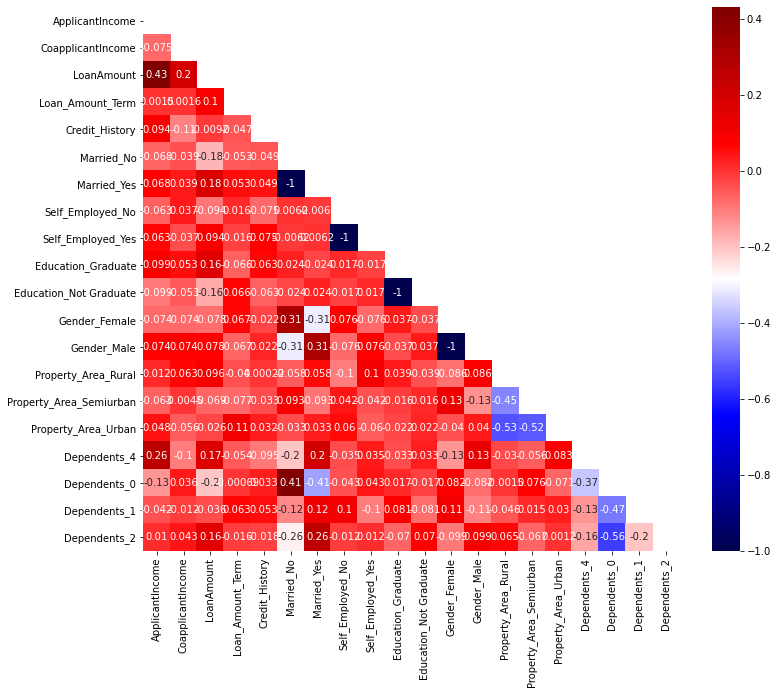

In [35]:
# Pearson's Correlation Coefficient

corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [36]:
# With the following function we can select highly correlated features
# It will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [37]:
corr_features = correlation(X_train, 0.85) # 85% is threshold value
print(len(corr_features))
print(corr_features)

4
{'Self_Employed_Yes', 'Married_Yes', 'Gender_Male', 'Education_Not Graduate'}


In [38]:
X_train = X_train.drop(columns = corr_features)
X_test = X_test.drop(columns = corr_features)

print(X_train.shape)
print(X_test.shape)

(231, 16)
(58, 16)


Depth =  2 , Training Accuracy =  0.9307359307359307 , Test Accuracy =  0.8793103448275862 , Diff =  5.142558590834456  %
Depth =  4 , Training Accuracy =  0.9567099567099567 , Test Accuracy =  0.896551724137931 , Diff =  6.015823257202568  %
Depth =  8 , Training Accuracy =  0.987012987012987 , Test Accuracy =  0.896551724137931 , Diff =  9.046126287505595  %
Depth =  15 , Training Accuracy =  1.0 , Test Accuracy =  0.8620689655172413 , Diff =  13.793103448275868  %
Depth =  20 , Training Accuracy =  1.0 , Test Accuracy =  0.8793103448275862 , Diff =  12.06896551724138  %
Depth =  25 , Training Accuracy =  1.0 , Test Accuracy =  0.8793103448275862 , Diff =  12.06896551724138  %
Depth =  35 , Training Accuracy =  1.0 , Test Accuracy =  0.8793103448275862 , Diff =  12.06896551724138  %
Depth =  40 , Training Accuracy =  1.0 , Test Accuracy =  0.8793103448275862 , Diff =  12.06896551724138  %
Depth =  45 , Training Accuracy =  1.0 , Test Accuracy =  0.8793103448275862 , Diff =  12.068965

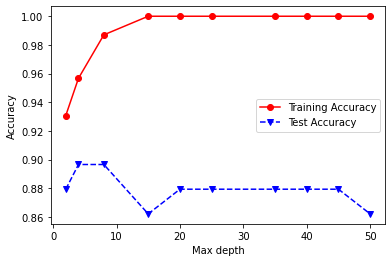

In [46]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
maxdepths = [2,4,8,15,20,25,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

print('----------')
train_loss=log_loss(y_train,y_predTrain) 
test_loss=log_loss(y_test,y_predTest)

print("Training Loss: ",train_loss)   
print("Test Loss: ",test_loss)

# Plot of training and test accuracies    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')


# Table for Precision, Recal & F1 Score
from sklearn import metrics
print('----------')
print("Classification Report")
print(metrics.classification_report(y_test, y_predTest, digits = 3))


In [47]:
# Apply corss validation technique to find the best result
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
kfold_validation = KFold(n_splits = 5,shuffle=True)

clf = DecisionTreeClassifier()
results = cross_val_score(clf, X, y, cv = kfold_validation)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))

[0.82758621 0.86206897 0.9137931  0.81034483 0.89473684]

Results =  0.8617059891107077 +/- 0.03900349967098296


In [41]:
# Applying StratifedKFold for cross validation
# This is a method of cross validation that is used to evaluate the performance of a model by randomly splitting the dataset into training and testing sets. This is good for imbalance dataset to meausre.
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5)
clf = DecisionTreeClassifier()
results = cross_val_score(clf, X, y, cv = skfold)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))

[0.87931034 0.86206897 0.89655172 0.75862069 0.87719298]

Results =  0.8547489413188142 +/- 0.04929238013829515


In [49]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()

print('----------')
train_loss=log_loss(y_train,y_predTrain) 
test_loss=log_loss(y_test,y_predTest)

print("Training Loss: ",train_loss)   
print("Test Loss: ",test_loss)

# Table for Precision, Recal & F1 Score
from sklearn import metrics
print('----------')
print("Classification Report")
print(metrics.classification_report(y_test, y_predTest, digits = 3))

Train Accuracy:  0.9264069264069265
Test Accuracy:  0.896551724137931

----------
Training Loss:  9.992007221626413e-16
Test Loss:  4.764024302569074
----------
Classification Report
              precision    recall  f1-score   support

           0      0.923     0.923     0.923        52
           1      0.333     0.333     0.333         6

    accuracy                          0.862        58
   macro avg      0.628     0.628     0.628        58
weighted avg      0.862     0.862     0.862        58



----------
Training Loss:  2.541814713045376
Test Loss:  4.168500585504056
----------
K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.8448275862068966 , Difference =  15.517241379310342 %
K =  5 , Training Accuracy =  0.9177489177489178  Test Accuracy =  0.896551724137931 , Difference =  2.119719361098671 %
K =  10 , Training Accuracy =  0.9264069264069265  Test Accuracy =  0.896551724137931 , Difference =  2.9855202268995407 %
K =  15 , Training Accuracy =  0.9264069264069265  Test Accuracy =  0.896551724137931 , Difference =  2.9855202268995407 %
K =  20 , Training Accuracy =  0.9264069264069265  Test Accuracy =  0.896551724137931 , Difference =  2.9855202268995407 %
K =  25 , Training Accuracy =  0.9264069264069265  Test Accuracy =  0.896551724137931 , Difference =  2.9855202268995407 %
K =  30 , Training Accuracy =  0.9264069264069265  Test Accuracy =  0.896551724137931 , Difference =  2.9855202268995407 %
----------
Classification Report
              precision    recall  f1

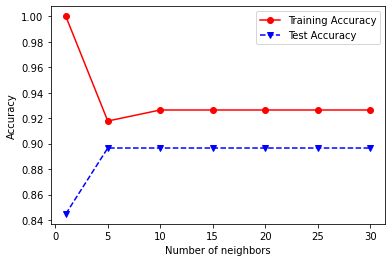

In [43]:
# KNN with Euclidean Distance Metric
from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_pred_Test = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_pred_Test))

# Showing training and test Loss
print('----------')
train_loss=log_loss(y_train,y_predTrain) 
test_loss=log_loss(y_test,y_predTest)

print("Training Loss: ",train_loss)   
print("Test Loss: ",test_loss)


print('----------')
# Plot of training and test accuracies
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

# Table for Precision, Recal & F1 Score
from sklearn import metrics
print('----------')
print("Classification Report")
print(metrics.classification_report(y_test, y_predTest, digits = 3))

In [48]:
# Applying StratifedKFold for cross validation
clf = KNeighborsClassifier()
results = cross_val_score(clf, X, y, cv = skfold)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))

[0.93103448 0.9137931  0.9137931  0.9137931  0.9122807 ]

Results =  0.9169388989715669 +/- 0.007072091232939214
